In [1]:


import numpy as np 
import pandas as pd 


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization

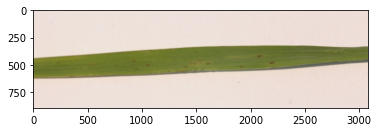

In [3]:
imre = plt.imread("data/Leaf smut/DSC_0336.jpg")
img = plt.imshow(imre)

In [4]:
imre.shape

(897, 3081, 3)

In [5]:
label = []
image = []
image_width = 500
image_height = 500

import os
for i in os.listdir("data"):
        for j in  os.listdir("data/"+i):
            img = cv2.imread("data/"+i+"/"+j)
            img = cv2.resize(img,(image_width,image_height))
            label.append(i)
            image.append(img)
                
x = np.array(image)
y = np.array(label)

x.shape , y.shape

((120, 500, 500, 3), (120,))

In [6]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [7]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [8]:

x_train = x_train/255
x_test = x_test/255

In [9]:

data_agu = keras.Sequential([
            keras.layers.experimental.preprocessing.RandomFlip(),
            keras.layers.experimental.preprocessing.RandomRotation(0.4),
            keras.layers.experimental.preprocessing.RandomContrast(0.4)
            ])

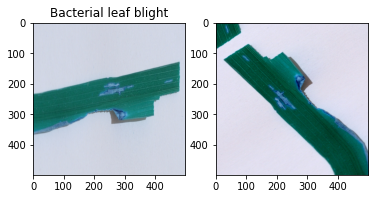

In [10]:
from sklearn.metrics import accuracy_score
from lib.utils import *
ac=[]
plt.subplot(1,2,1)
plt.imshow(x[0])
plt.title(label[0])


plt.subplot(1,2,2)
plt.imshow(data_agu(x)[0])

In [11]:
model_cnn = Sequential([
    data_agu,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(3)
])

In [12]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
epoch=10
history = model_cnn.fit(x_train[:80],y_train[:80],epochs=epoch,verbose=0, validation_data=(x_train[80:],y_train[80:]))

In [13]:

ac.append(accuracy_score(model_cnn,y_test,sample_weight=0.2)*100)

In [14]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [15]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
import skimage
def load_image_files(container_path, dimension=(104, 104)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = ""
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)
image_dataset = load_image_files("data") 
print(image_dataset.target_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [17]:
import tensorflow as tf

tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=32448))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=5)
ac.append(accuracy_score(model,y_test,sample_weight=0.8)*100)

Epoch 1/5
3/3 [==============================] - 1s 12ms/step - loss: 5.8371
Epoch 2/5
3/3 [==============================] - 0s 10ms/step - loss: 2.0612
Epoch 3/5
3/3 [==============================] - 0s 9ms/step - loss: 0.7464
Epoch 4/5
3/3 [==============================] - 0s 9ms/step - loss: -0.6059
Epoch 5/5
3/3 [==============================] - 0s 8ms/step - loss: -0.8177


C:\Users\VC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>


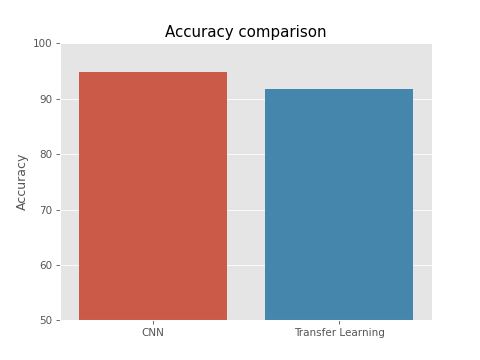

the accuracy of CNN is 94.88 and Transfer Learning is 91.8


(50.0, 100.0)

In [18]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('seaborn')
x=['CNN','Transfer Learning']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)